# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [2]:
data_dir = r'cell_images\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
train_path = data_dir + '\\train'
test_path = data_dir + '\\test'


In [5]:
train_path

'cell_images\\cell_images\\train'

In [6]:
os.listdir(train_path) , os.listdir(test_path)

(['parasitized', 'uninfected'], ['parasitized', 'uninfected'])

In [7]:
os.listdir(train_path + '\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

### Visualizing the Data



In [8]:
parasitized_cell_1_path = train_path + '\\parasitized' +'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

parasitized_cell_1_path

'cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
imread(parasitized_cell_1_path).shape

(148, 142, 3)

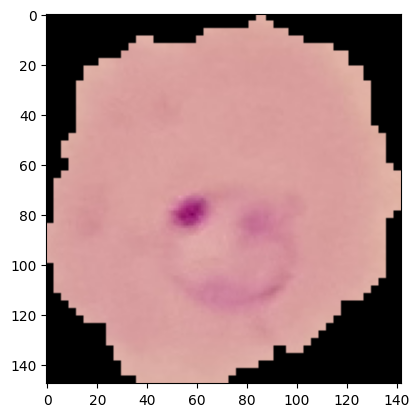

In [10]:
plt.imshow(imread(parasitized_cell_1_path))

In [11]:
os.listdir(train_path + '\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [12]:
uninfected_cell_1_path = train_path + '\\uninfected' +'\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

uninfected_cell_1_path

'cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

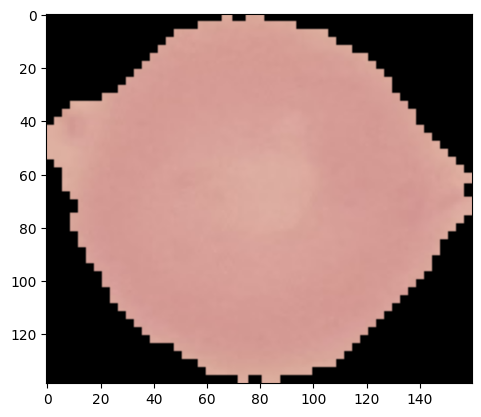

In [13]:
plt.imshow(imread(uninfected_cell_1_path))

## **Let's check how many images there are.**

In [14]:
len(os.listdir(train_path+'\\parasitized')) , len(os.listdir(train_path+'\\uninfected'))


(12480, 12479)

In [15]:
len(os.listdir(test_path+'\\parasitized')) , len(os.listdir(test_path+'\\uninfected'))

(1300, 1300)

### **Let's find out the average dimensions of these images.**

In [16]:
imread(uninfected_cell_1_path).shape

(139, 160, 3)

In [17]:
train_path

'cell_images\\cell_images\\train'

In [18]:
train_dim1 = []
train_dim2 = []
for image_filename in os.listdir(train_path+'\\uninfected'):
    
    img = imread(train_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    train_dim1.append(d1)
    train_dim2.append(d2)

In [19]:
test_dim1 = []
test_dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    test_dim1.append(d1)
    test_dim2.append(d2)

In [20]:
len(train_dim1) , len(train_dim2)

(12479, 12479)

In [21]:
len(test_dim1) , len(test_dim2)

(1300, 1300)

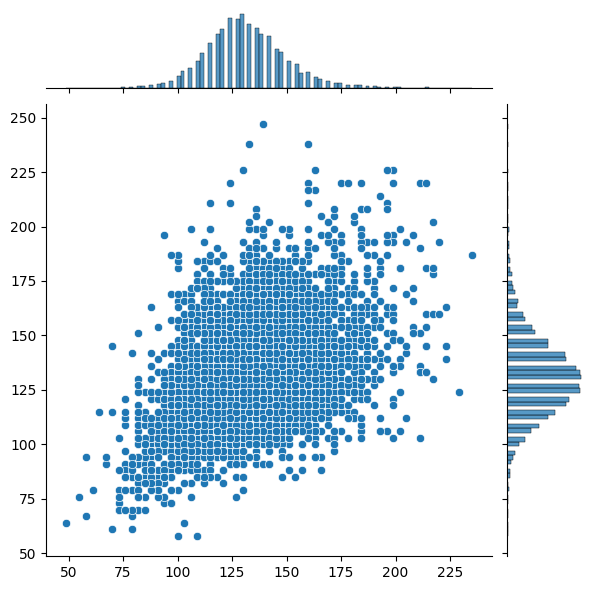

In [22]:
sns.jointplot(x = train_dim1 , y =train_dim2)

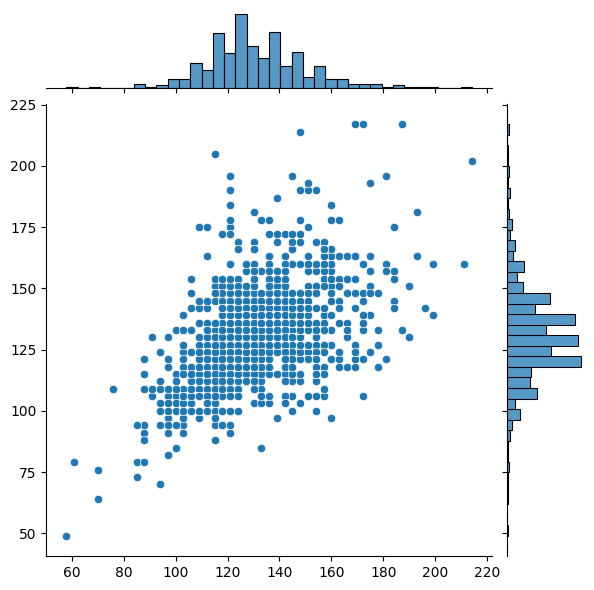

In [23]:
sns.jointplot(x = test_dim1 , y =test_dim2)


In [24]:
np.mean(train_dim1) , np.mean(train_dim2)

(131.64820899110507, 131.4041990544114)

In [25]:
np.mean(test_dim1) , np.mean(test_dim2)

(130.92538461538462, 130.75)

In [26]:
image_shape = (130 , 130 , 3)

## Preparing the Data for the model

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
imread( parasitized_cell_1_path).max() , imread( uninfected_cell_1_path).max()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


(0.9098039, 0.88235295)

In [29]:
1/255

0.00392156862745098

In [30]:
image_gen = ImageDataGenerator(rotation_range= 20 ,
                               width_shift_range= 0.1 ,
                               height_shift_range= 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True , 
                               fill_mode = 'nearest',
                               rescale=1/255)

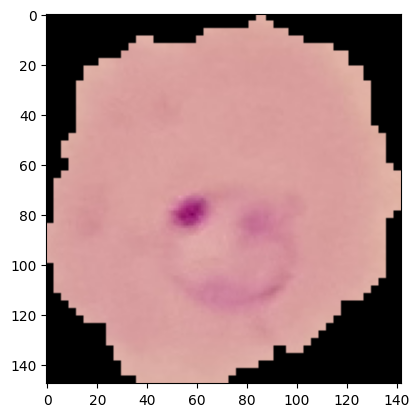

In [31]:
pare_image = imread(parasitized_cell_1_path)
plt.imshow(pare_image)

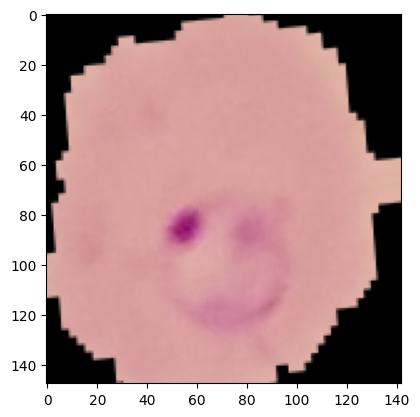

In [32]:
plt.imshow(image_gen.random_transform(pare_image))

### apply transformation in image

In [33]:
train_path

'cell_images\\cell_images\\train'

In [34]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [35]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [36]:
batch_size =128

train_image_gen = image_gen.flow_from_directory(train_path , 
                                                target_size= image_shape[:2] ,
                                                color_mode='rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary')


Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path , 
                                                target_size= image_shape[:2] ,
                                                color_mode='rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary',
                                                shuffle = False
                                                )

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices , test_image_gen.class_indices

({'parasitized': 0, 'uninfected': 1}, {'parasitized': 0, 'uninfected': 1})

In [39]:
train_image_gen.image_shape

(130, 130, 3)

# Creating the Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D  , Flatten

In [41]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (3, 3 ) , input_shape = image_shape , activation = 'relu' ))

model.add(MaxPooling2D(pool_size= (3 , 3)))

model.add(Conv2D(filters = 64 , kernel_size = (2, 2 )  , activation = 'relu' ))

model.add(MaxPooling2D(pool_size= (2 , 2)))

model.add(Conv2D(filters = 64 , kernel_size = (2, 2 )  , activation = 'relu' ))

model.add(MaxPooling2D(pool_size= (2 , 2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1 , activation = 'sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 41, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0

In [42]:
model.compile(loss= 'binary_crossentropy' , optimizer = 'adam' , metrics= ['acc'])


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss' , patience = 3)

In [44]:
# results = model.fit(train_image_gen , 
#                     epochs = 20,
#                     validation_data = test_image_gen,
#                     callbacks = [early_stop],
#                     batch_size=8)

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model = load_model('malaria_detector.h5')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [48]:
model.evaluate_generator(test_image_gen)

C:\Users\xobed\AppData\Local\Temp\ipykernel_3100\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.13902166485786438, 0.9519230723381042]

In [49]:
model.metrics_names

['loss', 'accuracy']

In [63]:
pred= model.predict_generator(test_image_gen)

C:\Users\xobed\AppData\Local\Temp\ipykernel_3100\423322452.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model.predict_generator(test_image_gen)


### Because it's medical case we will but high threshold to make sure it's classified correctly

In [80]:
predict =  pred > 0.8

In [76]:
len(predict)

2600

In [77]:
from sklearn.metrics import classification_report ,confusion_matrix

In [78]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [79]:
print(classification_report(test_image_gen.classes , predict))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1300
           1       1.00      0.38      0.55      1300

    accuracy                           0.69      2600
   macro avg       0.81      0.69      0.66      2600
weighted avg       0.81      0.69      0.66      2600



In [69]:
confusion_matrix(test_image_gen.classes  , predict)

array([[1251,   49],
       [ 114, 1186]], dtype=int64)

# Predicting on an Image

In [84]:
from tensorflow.keras.preprocessing import image

test_image =  image.load_img(parasitized_cell_1_path , target_size= image_shape)

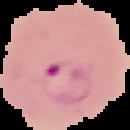

In [85]:
test_image

In [87]:
test_image_array =  image.img_to_array(test_image)

In [89]:
test_image_array.max()

231.0

In [91]:
test_image_array = test_image_array /255 
 

In [92]:
test_image_array.max()

0.90588236

In [93]:
test_image_array.shape

(130, 130, 3)

In [95]:
test_image_array =  np.expand_dims(test_image_array , axis=0)

In [96]:
model.predict(test_image_array)

1/1 [==============================] - 0s 216ms/step


array([[0.00066124]], dtype=float32)